## 제주도의 재난지원금은 목적에 부합하게 이용되었는가?
(1) 재난지원금으로 인해 경제가 활성화되었는가? (소비가 창출되었는가?)

(2) 영세상인(소상공인)에게 재난지원금이 충분히 쓰였는가?

- 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib

plt.rcParams['font.family'] = 'Malgun Gothic'
pal = 'mako'
pal2 = 'viridis'


In [2]:
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
font_name

matplotlib.rc('font',family=font_name)

In [3]:
# 데이터 불러오기

df5 = pd.read_csv('./data/KRI-DAC_Jeju_data5.txt',sep=',',header=0)
df6 = pd.read_csv('./data/KRI-DAC_Jeju_data6.txt',sep=',',header=0)
df7 = pd.read_csv('./data/KRI-DAC_Jeju_data7.txt',sep=',',header=0)
df8 = pd.read_csv('./data/KRI-DAC_Jeju_data8.txt',sep=',',header=0)

In [4]:
df7.drop(['X','Y'], axis=1, inplace=True)

In [5]:
df = pd.concat([df5,df6,df7,df8])

In [6]:
df.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06
3,4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06
4,5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06


In [7]:
# 결측치 확인

print(df.isnull().sum())

OBJECTID         0
Field1           0
YM               0
SIDO             0
SIGUNGU          0
FranClass        0
Type             0
Time             0
TotalSpent       0
DisSpent         0
NumofSpent       0
NumofDisSpent    0
POINT_X          0
POINT_Y          0
dtype: int64


In [8]:
# OBJECTID, Field1 삭제
df.drop(['OBJECTID', 'Field1' ], axis=1, inplace=True)

### 재난지원금으로 경제가 활성화 되었는가? 

In [9]:
# 월별 소비 추이 관찰

df_YM_Spent = df.groupby('YM').sum()[['TotalSpent','DisSpent','NumofSpent','NumofDisSpent']].reset_index()

In [10]:
df_YM_Spent

,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent
0,202005,168687712199,24180094624,5151045,782769
1,202006,166978502264,9666349024,5185908,384342
2,202007,179293584847,1343557825,5746845,56363
3,202008,185466211151,543655174,5834132,18660


In [11]:
df_YM_Spent['TotalSpent_%']=df_YM_Spent.TotalSpent.apply(lambda x: x/df_YM_Spent.TotalSpent.sum()*100)
df_YM_Spent['DisSpent_%']=df_YM_Spent.DisSpent.apply(lambda x: x/df_YM_Spent.DisSpent.sum()*100)
df_YM_Spent.YM = df_YM_Spent.YM.apply(lambda x:x%10) 
df_YM_Spent.YM = df_YM_Spent.YM.astype('object') 

In [12]:
df_YM_Spent

,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,TotalSpent_%,DisSpent_%
0,5,168687712199,24180094624,5151045,782769,24.083588,67.667563
1,6,166978502264,9666349024,5185908,384342,23.839563,27.051105
2,7,179293584847,1343557825,5746845,56363,25.597791,3.759923
3,8,185466211151,543655174,5834132,18660,26.479058,1.521409


In [13]:
# 월별 제주공항 내국인 도착 관찰(관광객)
# 조사 결과 제주공항에 국제선 이용 입국자는 없음

tour = pd.read_csv('./data/airport.csv', header=0)
tour['여객_%']=tour['여객(명)'].apply(lambda x: x/3849338*100)
tour

,월,운항(편),여객(명),여객_%
0,5,5638,792703,20.593229
1,6,5898,891945,23.171387
2,7,6407,1022529,26.563762
3,8,6938,1142161,29.671621
4,계,24881,3849338,100.000000


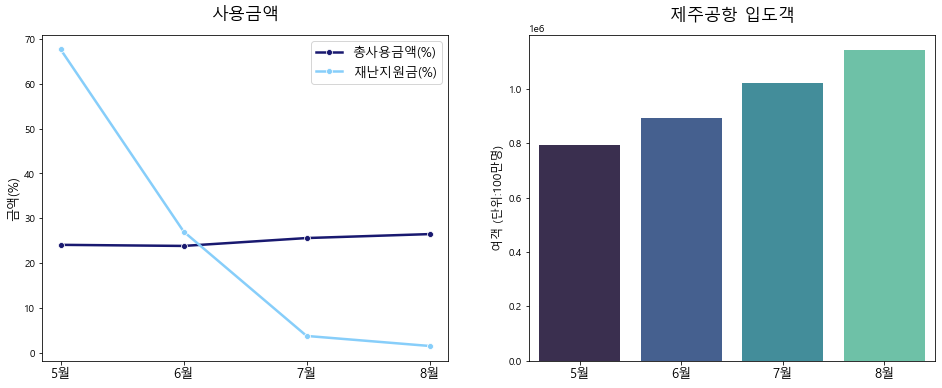

In [14]:
## 왜그러지

f , ax = plt.subplots(1,2,figsize=(16,6))


sns.lineplot(data=df_YM_Spent,x='YM',y='TotalSpent_%',label='총사용금액(%)',ax=ax[0],lw=2.5,color='midnightblue',marker='o')
sns.lineplot(data=df_YM_Spent,x='YM',y='DisSpent_%',label='재난지원금(%)',ax=ax[0],lw=2.5,color='lightskyblue',marker='o')


sns.barplot(data=tour[:-1],x='월',y='여객(명)',ax=ax[1],palette=pal)

ax[0].set_title('사용금액',fontsize=17,pad=15)
ax[0].set_xticks([5,6,7,8])
ax[0].set_xticklabels (['5월','6월','7월','8월'],fontsize=13)
ax[0].set_xlabel('')
ax[0].set_ylabel('금액(%)',fontsize=13)
ax[0].legend(fontsize=13)

ax[1].set_xticklabels (['5월','6월','7월','8월'],fontsize=13)
ax[1].set_xlabel('')
ax[1].set_title('제주공항 입도객',fontsize=17,pad=15)
ax[1].set_ylabel('여객 (단위:100만명)',fontsize=12)
'mako'

plt.show()

In [15]:
# 월별 확진자 파악(전국, 제주도)

from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import urllib
import requests
import json
import pandas as pd
from datetime import datetime,timedelta
import xmltodict # 결과가 xml 형식으로 반환된다. 이것을 dict 로 바꿔주는 라이브러리다

In [16]:
my_api_key = '0U7SMSpqxpjza1zBTutpoHD19XceuRABZlnCCNAeLKIXiJyFA2D%2BWS3IlAmQ%2FPB7Y0MTvE0Qwml5zywvRkpNaA%3D%3D'

# 서비스 url 주소
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst
# 서비스에 필요한 파라미터 모음
queryParams = '?' + \
'ServiceKey=' + '{}'.format(my_api_key) + \
'&pageNo='+ '1' + \
'&numOfRows='+ '999' + \
'&startCreateDt={}&endCreateDt={}'.format('20200501','20200831')

#서비스url에 필요한 파라미터들을 붙여서 응답결과를 얻음.
result = requests.get(url + queryParams)

# 응답결과 파싱하기. ( 사용자가 원하는 형태로 변경)
# 응답 key 값이 영문화 되어 식별이 어려워 openAPI 문서를 참고하여
# replayce 를 통해 결과를 한글화 했다.

result = result.content 
jsonString = json.dumps(xmltodict.parse(result), indent = 4)
#jsonString = jsonString.replace('resultCode', '결과코드').replace('resultMsg', '결과메세지').replace('numOfRows', '한 페이지 결과 수').replace('pageNo', '페이지 수').replace('totalCount', '전체 결과 수').replace('seq', '게시글번호(감염현황 고유값)').replace('stateDt', '기준일').replace('stateTime', '기준시간').replace('decideCnt', '확진자 수').replace('clearCnt', '격리해제 수').replace('examCnt', '검사진행 수').replace('deathCnt', '사망자 수').replace('careCnt', '치료중 환자 수').replace('resutlNegCnt', '결과 음성 수').replace('accExamCnt', '누적 검사 수').replace('accExamCompCnt', '누적 검사 완료 수').replace('accDefRate', '누적 환진률').replace('createDt', '등록일시분초').replace('updateDt', '수정일시분초')

js = json.loads(jsonString)

In [17]:
corona_origin = pd.DataFrame(js['response']['body']['items']['item'])

In [18]:
corona_origin.head()

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2020-08-31 10:30:43.057,0,1354,검역,隔離區,Lazaretto,3,1267,87,0,3,-,4073,2020년 08월 31일 00시,null
1,2020-08-31 10:30:43.057,0,45,제주,济州,Jeju,6,26,19,5,1,6.71,4072,2020년 08월 31일 00시,null
2,2020-08-31 10:30:43.057,0,236,경남,庆南,Gyeongsangnam-do,1,166,70,1,0,7.02,4071,2020년 08월 31일 00시,null
3,2020-08-31 10:30:43.057,54,1455,경북,庆北,Gyeongsangbuk-do,2,1356,45,2,0,54.65,4070,2020년 08월 31일 00시,null
4,2020-08-31 10:30:43.056,0,142,전남,全南,Jeollanam-do,5,42,100,5,0,7.62,4069,2020년 08월 31일 00시,null


In [19]:
corona_jeju = corona_origin[corona_origin.gubun=='제주'][['stdDay','gubun','defCnt','incDec']]

In [20]:
corona_jeju['month']= corona_jeju['stdDay'].apply(lambda x: list(x.split())[1])
corona_jeju['day']=corona_jeju['stdDay'].apply(lambda x: list(x.split())[2])
corona_jeju.month=corona_jeju.month.apply(lambda x: x[-2:])
corona_jeju.day=corona_jeju.day.apply(lambda x: int(x[:-1]))

In [21]:
print(corona_jeju.month.unique())
print(corona_jeju.day.unique())

['8월' '7월' '6월' '5월']
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]


In [22]:
corona_jeju.sort_values(by=['month','day'],inplace=True)

In [23]:
corona_jeju.incDec=corona_jeju.incDec.astype('int')
corona_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 2319 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stdDay  123 non-null    object
 1   gubun   123 non-null    object
 2   defCnt  123 non-null    object
 3   incDec  123 non-null    int32 
 4   month   123 non-null    object
 5   day     123 non-null    int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 6.2+ KB


In [24]:
# 월별로 확진자가 미미, 전국적 경향에 따라 8월에 증가

corona_jeju.groupby('month').sum()['incDec']

month
5월     2
6월     4
7월     7
8월    19
Name: incDec, dtype: int32

In [25]:
# 중간에 엑셀로 처리했습니다...
corona_origin[['stdDay','gubun','defCnt','incDec']].to_csv('example2.csv',encoding='CP949')

In [26]:
corona_korea = pd.read_csv('./data/corona_korea.csv')

In [27]:
corona_korea.head()
corona_korea.incDec = corona_korea.incDec.astype('int')

In [28]:
corona_korea_month = pd.DataFrame(corona_korea.groupby('month').sum()['incDec']).reset_index()

In [29]:
corona_korea_month

,month,incDec
0,5,703
1,6,1334
2,7,1506
3,8,5642


<AxesSubplot:xlabel='월', ylabel='여객(명)'>

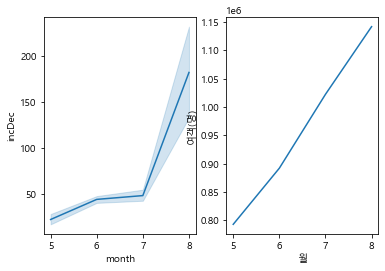

In [30]:
# 전국 확진자와 제주공항 입국자 시각화
# 7월 이후 대유행에도 불구, 입국자 증가

f, ax = plt.subplots(1,2)
sns.lineplot(x='month',y='incDec',data=corona_korea, ax=ax[0])
sns.lineplot(x='월',y='여객(명)',data=tour[:-1], ax=ax[1])

**관찰**
- 시간 추이에 따라 총 소비금액 증가, 재난지원금 소비 감소
- 시간 추이에 따라 제주도 내 확진자 증가(그러나 20명대 미만으로 미미), 전국 확진자 완만하게 증가하다 8월부터 급증
- 제주공항 입국자는 월별로 증가

**결론**
- 확진자 추이는 제주도 여행객에 영향 X
- 재난지원금 사용이 감소했음에도 불구하고 총 사용금액이 유지된 이유는 증가한 관광객 때문
- 5월에 관광객이 적었음에도 불구하고, 총 소비금액이 8월과 큰 차이가 없는 것으로 보아 재난지원금의 경제적 효과는 유효함.
- 다만, 재난지원금의 소비 형태가 5월 초반에 몰려서 불균형적임

In [31]:
# 재난지원금 이전 카드 사용액 # 일단 보류 
# 관광객 수 확인하면 좋을듯(올해의 경우 입도객이 5월보다 6월에 더 많았음)

before = pd.read_csv('./data/card_before.csv',sep=',',header=0,encoding='CP949')

In [32]:
before.head()

,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500,4365500.518,380992.059,2844836.615,2020-12-15
1,2017-01,서귀포시,남원읍,골프장 운영업,남성,1988,285901584,4365500.518,380992.059,2844836.615,2020-12-15
2,2017-01,서귀포시,남원읍,과실 및 채소 소매업,남성,685,49486002,4365500.518,380992.059,2844836.615,2020-12-15
3,2017-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,남성,6,116000,4365500.518,380992.059,2844836.615,2020-12-15
4,2017-01,서귀포시,남원읍,그외 기타 종합 소매업,남성,1,100000,4365500.518,380992.059,2844836.615,2020-12-15


In [33]:
before_Time_Spent = before.groupby('년월').sum()[['이용자수','이용금액']].reset_index()
before_Time_Spent.index = before_Time_Spent.년월
before_Time_Spent.head()

,년월,이용자수,이용금액
년월,,,
2017-01,2017-01,3369500,135038943209
2017-02,2017-02,3161697,120442766298
2017-03,2017-03,3545487,133803458498
2017-04,2017-04,3673849,140301262160
2017-05,2017-05,4111327,153531762462


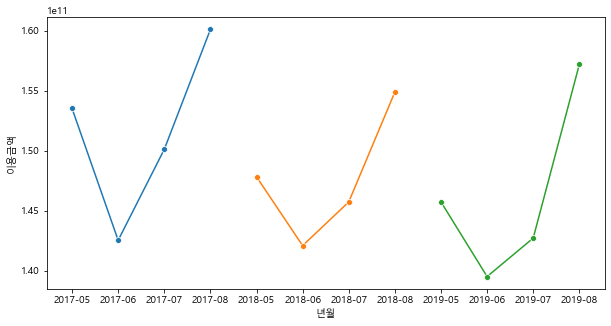

In [34]:
# 매년 소비추이 확인(5~8) 

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10,5))
sns.lineplot(x='년월', y='이용금액', data=before_Time_Spent.loc['2017-05':'2017-08',:], marker='o')
sns.lineplot(x='년월', y='이용금액', data=before_Time_Spent.loc['2018-05':'2018-08',:], marker='o')
sns.lineplot(x='년월', y='이용금액', data=before_Time_Spent.loc['2019-05':'2019-08',:], marker='o')
plt.ylim()
plt.show()

### 영세 상인에게 재난지원금이 집중되었는가?

- 데이터 전처리

In [35]:
df_n = df.copy()

In [36]:
# 시간대 정리

def timeslot(time):
    time = time[:len(time)-1]
    if time != 'x':
        time = int(time)
        if 2<= time < 6:
            return '새벽'
        elif 6<= time < 11:
            return '오전'
        elif 11<= time < 15:
            return '점심'
        elif 15<= time < 18:
            return '오후'
        elif 18<= time < 22:
            return '저녁'
        elif time >= 22 or time < 2:
            return '심야'
    else:
        return '무승인거래'

df_n['DayNight']=df_n.Time.apply(timeslot)

In [37]:
# 업종 정리

df_n.replace(dict.fromkeys(['택시', '기타교통수단', '통신기기'], '교통/통신'), inplace=True)
df_n.replace(dict.fromkeys(['대형할인점', '농축협직영매장', '농협하나로클럽', '편의점', '슈퍼마켓', '정육점', '기타유통업', '연쇄점', '상품권', '인삼제품', '홍삼제품', '농축수산품', '주류판매점', '기타건강식', '건강식품(회원제형태)'], '마트/편의점(유통)'), inplace=True)
df_n.replace(dict.fromkeys(['악기점', 'DVD음반테이프판매', '문화취미기타', '영화관', '티켓', '수족관', '화랑'], '영화/문화'), inplace=True)
df_n.replace(dict.fromkeys(['내의판매점', '양품점', '옷감직물', '귀금속', '기타직물', '스포츠의류', '가방', '정장', '악세사리', '기타잡화', '신발', '기타의류', '단체복', '아동의류', '캐쥬얼의류', '맞춤복점', '제화점', '인터넷Mall', '인터넷종합Mall'], '쇼핑/패션'), inplace=True)
df_n.replace(dict.fromkeys(['제과점', '스넥', '기타음료식품'], '카페/베이커리'), inplace=True)
df_n.replace(dict.fromkeys(['미용재료', '화장품', '피부미용실', '미용원', '이용원'], '뷰티'), inplace=True)
df_n.replace(dict.fromkeys(['구내매점', '단란주점', '주점', '서양음식', '일반한식', '일식회집', '중국음식',  '유흥주점', '칵테일바'], '외식/주점'), inplace=True)
df_n.replace(dict.fromkeys(['세탁소', '애완동물', '화원', '침구수예점', '성인용품점', '가전제품', '기타가구', '조명기구', '민예공예품', '주방용식기', '기타전기제품', '소프트웨어', '주방용구', '카페트커텐천막', '컴퓨터', '카메라', '일반가구', '정수기', '철제가구', '시계', '안경', '사우나', '안마스포츠마사지', '사진관', '인테리어', 'CATV'], '생활/기타'), inplace=True)
df_n.replace(dict.fromkeys(['완구점', '화방표구점', '문구용품', '일반서적', '출판인쇄물', '기타사무용', '사무기기', '전문서적', '정기간행물', '기타서적문구', '서적출판(회원제형태)'], '서점/문구'), inplace=True)
df_n.replace(dict.fromkeys(['기타보험', '손해보험'], '금융'), inplace=True)
df_n.replace(dict.fromkeys(['기념품점', '기타숙박업', '특급호텔', '2급호텔', '1급호텔', '콘도', '렌트카', '관광여행', '항공사', '여객선', '면세점'], '여행/숙박'), inplace=True)
df_n.replace(dict.fromkeys(['레져용품수리', '스포츠레져용품', '골프용품', '노래방', '당구장', '골프경기장', '볼링장', '골프연습장', '헬스크럽', '레져업소(회원제형태)', '기타레져업', '종합레져타운', '수영장', '테니스장', '기타회원제형태업소', ], '레저/스포츠'), inplace=True)
df_n.replace(dict.fromkeys(['유아원', '독서실', '보습학원', '기능학원', '기타교육', '외국어학원', '학원(회원제형태)', '예체능학원', '컴퓨터학원', '대학등록금', '학습지교육', '초중고교육기관'], '교육/육아'), inplace=True)
df_n.replace(dict.fromkeys(['주유소', '자동차정비', 'LPG', '세차장', '유류판매', '이륜차판매', '윤활유전문판매', '자동차시트타이어', '중고자동차', '수입자동차', '자동차부품', '주차장', '기타자동차서비스', '카인테리어', ], '주유/자동차'), inplace=True)
df_n.replace(dict.fromkeys(['약국', '종합병원', '기타의료기관및기기', '한약방', '제약회사', '의료용품', '건강진단', '한의원', '동물병원', '의원', '치과의원', '병원', '산후조리원', '치과병원'], '의료'), inplace=True)
df_n.replace(dict.fromkeys(['목재석재철물', '건축요업품', '골동품점', '기계공구', '기타건축자재', '보일러펌프', '페인트', '냉열기기', '유리', '과학기자재', '기타광학품', '기타연료', '중장비수리', ], '건설/제조'), inplace=True)
df_n.replace(dict.fromkeys(['기타농업관련', '비료농약사료종자', '농기계', '미곡상'], '농업'), inplace=True)
df_n.replace(dict.fromkeys(['사무서비스', '기타대인서비스', '화물운송', '보관창고업', '종합용역', '조세서비스', '가례서비스', '공공요금', '위탁급식업', '기타용역서비스', '기타수리서비스', '기타운송', '가정용품수리', '견인서비스', '부동산중개임대', '부동산분양', '신변잡화수리', '사무통신기기수리', '법률회계서비스', '사무서비스(회원제형태)', '정보서비스', '기타업종', '기타비영리유통'], '서비스/기타'), inplace=True)


In [38]:
df_n['s_Type'] = df['Type']

In [39]:
len(df_n.Type.unique())

18

**규모별 분석**

- 재난지원금/총매출의 비율로 보았을 때, 비교적 균일하게 재난지원금이 소비되었다.
- 영세/소상공인이 주 타겟층이었던 재난지원금의 목적을 생각했을 때 다소 아쉽다고 생각할 수 있을 듯 하다

In [40]:
df_FranClass_Spent = df_n.groupby('FranClass').sum()[['TotalSpent','DisSpent']].reindex(index=['영세','중소','중소1','중소2','일반'])
df_FranClass_Spent= df_FranClass_Spent.reset_index()
df_FranClass_Spent['percent']=df_FranClass_Spent.DisSpent / df_FranClass_Spent.TotalSpent *100

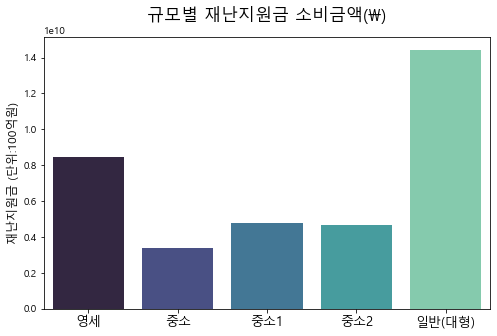

In [43]:
# 절대적 금액

f=plt.figure(figsize=(8,5))
sns.barplot(x='FranClass',y='DisSpent',data=df_FranClass_Spent,palette=pal)
plt.xlabel('')
plt.ylabel('재난지원금 (단위:100억원)',fontsize=12)
plt.xticks([0,1,2,3,4],['영세','중소','중소1','중소2','일반(대형)'],fontsize=13)
plt.title('규모별 재난지원금 소비금액(\)',fontsize=17,pad=16)

plt.show()

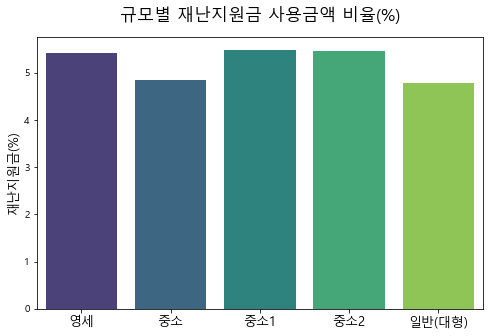

In [44]:
# 균일함

plt.figure(figsize=(8,5))
sns.barplot(x='FranClass',y='percent',data=df_FranClass_Spent,palette=pal2)
plt.xlabel('')
plt.ylabel('재난지원금(%)',fontsize=13)
plt.xticks([0,1,2,3,4],['영세','중소','중소1','중소2','일반(대형)'],fontsize=13)
plt.title('규모별 재난지원금 사용금액 비율(%)',fontsize=17,pad=16)


plt.show()

### 추가적인 분석

- 시간

In [59]:
time_spent = df_n.groupby('DayNight').sum()[['TotalSpent','DisSpent']].reindex(index=['무승인거래','새벽','오전','점심','오후','저녁','심야'])
time_spent

,TotalSpent,DisSpent
DayNight,,
무승인거래,23090474467,0
새벽,8699318176,203429085
오전,95017272262,4477420182
점심,205893556695,10810991447
오후,152325122723,8649468672
저녁,172645850691,10200210490
심야,42754415447,1392136771


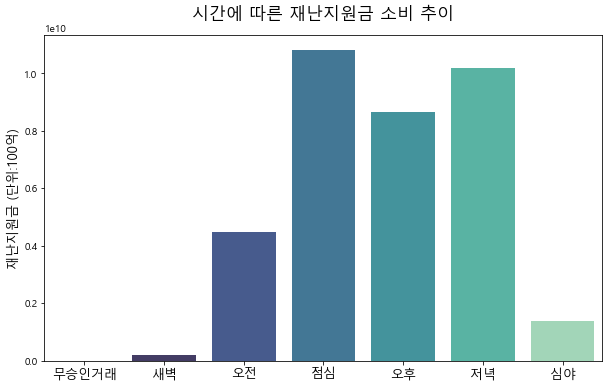

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x=time_spent.index, y=time_spent.DisSpent, palette=pal)
plt.xlabel('')
plt.xticks([0,1,2,3,4,5,6],['무승인거래','새벽','오전','점심','오후','저녁','심야'],fontsize=13)
plt.ylabel('재난지원금 (단위:100억)',fontsize=13)
plt.title('시간에 따른 재난지원금 소비 추이',fontsize=17, pad=15)
plt.show()

- 규모

In [127]:
order=[]

for i in ['무승인거래','새벽','오전','점심','오후','저녁','심야']:
    for j in ['영세','중소','일반']:
        order.append((i,j))

In [128]:
time_fran = df_n2.groupby(['DayNight','FranClass']).sum()[['TotalSpent','DisSpent']].reindex(index=order)
time_fran = time_fran.reset_index()
time_fran['Total_per']=''
time_fran['dis_per']=''
time_fran

,DayNight,FranClass,TotalSpent,DisSpent,Total_per,dis_per
0,무승인거래,영세,6099118967,0,,
1,무승인거래,중소,8095776230,0,,
2,무승인거래,일반,8895579270,0,,
3,새벽,영세,3189930092,53633380,,
4,새벽,중소,3661085426,101914072,,
5,새벽,일반,1848302658,47881633,,
6,오전,영세,12735668813,615069768,,
7,오전,중소,30906614810,1613800220,,
8,오전,일반,51374988639,2248550194,,
9,점심,영세,44913999447,2669863677,,


In [117]:
df_FranClass_Spent = df_n2.groupby('FranClass').sum()[['TotalSpent','DisSpent']].reindex(index=['영세','중소','일반'])
df_FranClass_Spent= df_FranClass_Spent.reset_index()
df_FranClass_Spent['percent']=df_FranClass_Spent.DisSpent / df_FranClass_Spent.TotalSpent *100
df_FranClass_Spent

,FranClass,TotalSpent,DisSpent,percent
0,영세,156714863738,8481179470,5.411854
1,중소,242431730878,12828690284,5.291671
2,일반,301279415845,14423786893,4.787512


In [48]:
time_fran[time_fran.FranClass=='일반']

,DayNight,FranClass,TotalSpent,DisSpent,Total_per,dis_per
4,무승인거래,일반,8895579270,0,,
9,새벽,일반,1848302658,47881633,,
14,오전,일반,51374988639,2248550194,,
19,점심,일반,92581994452,4287081719,,
24,오후,일반,75138017785,3845419843,,
29,저녁,일반,61744400883,3652573285,,
34,심야,일반,9696132158,342280219,,


In [49]:
df_FranClass_Spent[df_FranClass_Spent.FranClass=='영세']['TotalSpent']

0    156714863738
Name: TotalSpent, dtype: int64

In [129]:
count=0
for i, df in time_fran.iterrows():
    X = df.TotalSpent / df_FranClass_Spent[df_FranClass_Spent.FranClass==df.FranClass]['TotalSpent'] * 100
    Y = df.DisSpent / df_FranClass_Spent[df_FranClass_Spent.FranClass==df.FranClass]['DisSpent'] * 100
    time_fran.iloc[i,4]=X
    time_fran.iloc[i,5]=Y

In [130]:
time_fran.head()

,DayNight,FranClass,TotalSpent,DisSpent,Total_per,dis_per
0,무승인거래,영세,6099118967,0,3.891857,0.0
1,무승인거래,중소,8095776230,0,3.339405,0.0
2,무승인거래,일반,8895579270,0,2.952601,0.0
3,새벽,영세,3189930092,53633380,2.035499,0.632381
4,새벽,중소,3661085426,101914072,1.510151,0.794423


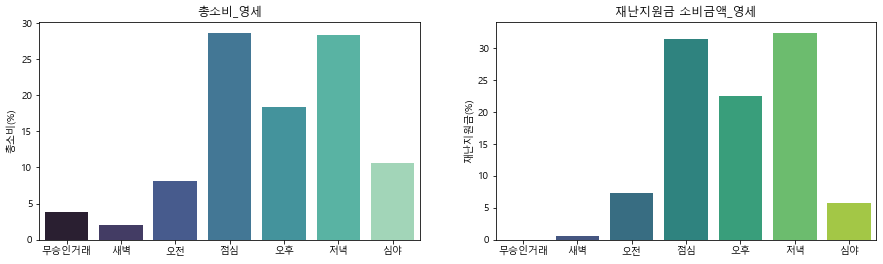

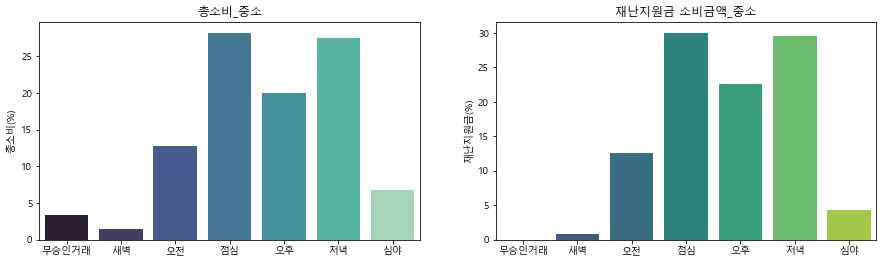

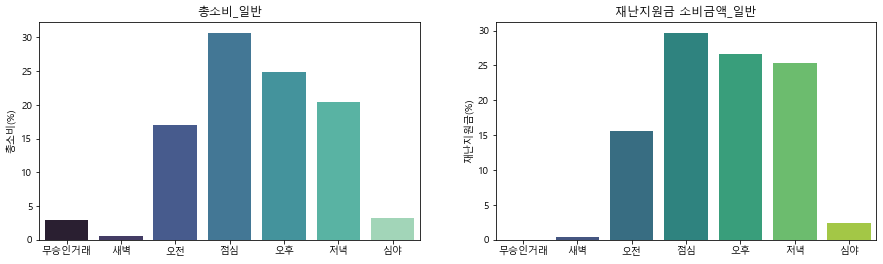

In [131]:
for fran in ['영세','중소','일반']:
    f = plt.figure(figsize=(15,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    
    sns.barplot(x='DayNight',y='Total_per',data=time_fran[time_fran.FranClass==fran],ax=ax1,palette=pal)
    ax1.set_title('총소비_{}'.format(fran))
    ax1.set_ylabel('총소비(%)')
    ax1.set_xlabel('')
    
    sns.barplot(x='DayNight',y='dis_per',data=time_fran[time_fran.FranClass==fran],ax=ax2,palette=pal2)
    ax2.set_title('재난지원금 소비금액_{}'.format(fran))
    ax2.set_ylabel('재난지원금(%)')
    ax2.set_xlabel('')
    
    plt.show()

# 총 소비와 재난지원금 소비 추이가 크게 다르지 않음
# 비율로 봐야 좋을듯

# 총 소비금액
# 영세: 외식 비율 압도적: 점심/저녁에 소비 집중
# 중소: 매출 규모가 커질 수록 마트/편의점 비중이 커져서 점심/저녁 집중 비중 낮아짐
# 일반: 여행/숙박, 자동차업으로 오후가 저녁을 능가

# 재난지원금 금액
# 영세: 외식 비율 높음
# 중소: 총 소비금액보다 마트/편의점 비율이 높음
# 일반: 마트/편의점에 집중, 여행/숙박 등의 타 업종에 재난지원금 사용 제한 덕분

In [145]:
time_fran.iloc[3:]

,DayNight,FranClass,TotalSpent,DisSpent,Total_per,dis_per
3,새벽,영세,3189930092,53633380,2.035499,0.632381
4,새벽,중소,3661085426,101914072,1.510151,0.794423
5,새벽,일반,1848302658,47881633,0.613485,0.331963
6,오전,영세,12735668813,615069768,8.12665,7.252173
7,오전,중소,30906614810,1613800220,12.748585,12.579618
8,오전,일반,51374988639,2248550194,17.052273,15.589181
9,점심,영세,44913999447,2669863677,28.659693,31.479863
10,점심,중소,68397562796,3854046051,28.213123,30.042397
11,점심,일반,92581994452,4287081719,30.729612,29.722304
12,오후,영세,28675610373,1900609202,18.297952,22.409727


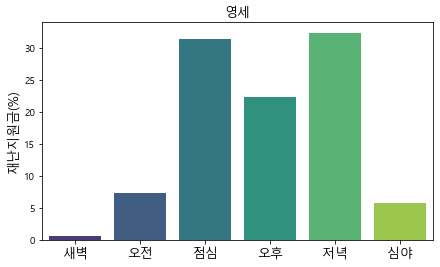

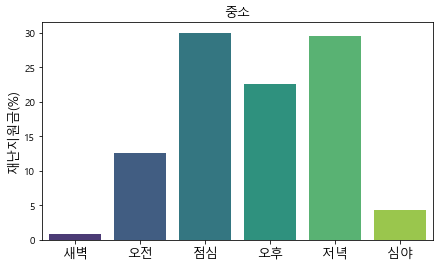

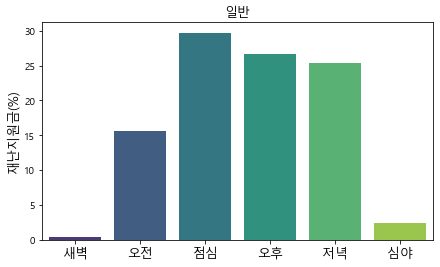

In [157]:
i = 131


for fran in ['영세','중소','일반']:
    
    f = plt.figure(figsize=(7,4))
    ax2 = f.add_subplot(111)
    
    sns.barplot(x='DayNight',y='dis_per',data=time_fran.iloc[3:][time_fran.iloc[3:].FranClass==fran],ax=ax2,palette=pal2)
    ax2.set_title('{}'.format(fran),fontsize=13)
    ax2.set_ylabel('재난지원금(%)',fontsize=13)
    ax2.set_xlabel('')
    ax2.set_xticklabels (['새벽','오전','점심','오후','저녁','심야'],fontsize=13)
    plt.show()
    
    




In [53]:
fran_type = df_n.groupby(["FranClass",'Type']).sum()[['TotalSpent','DisSpent']]
fran_type= fran_type.sort_values(by=['FranClass','TotalSpent','DisSpent'],ascending=False).reset_index()

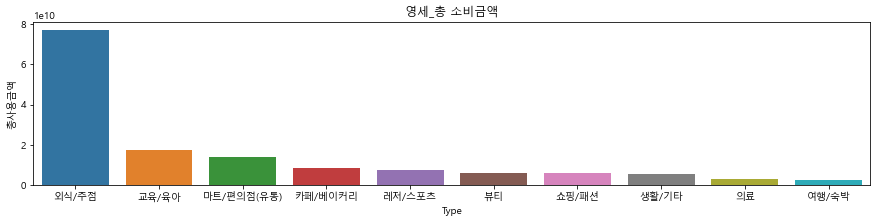

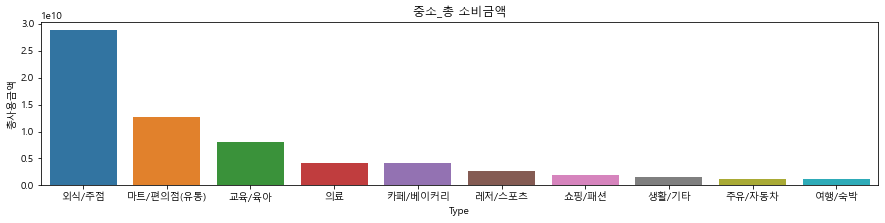

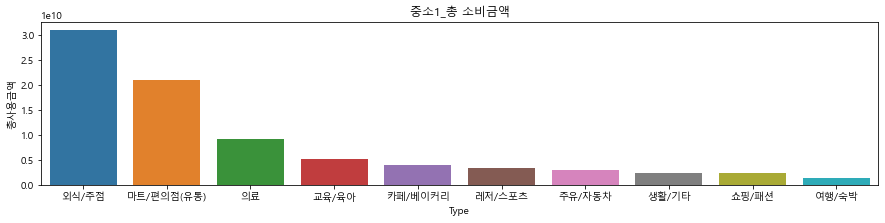

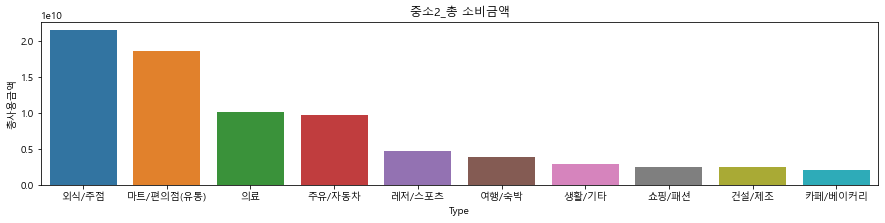

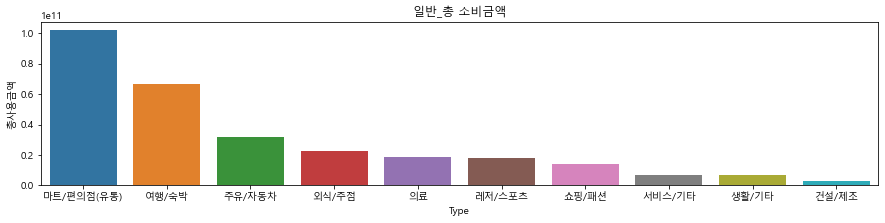

In [72]:
for fran in ['영세','중소','중소1','중소2','일반']:
    plt.figure(figsize=(15,3))
    sns.barplot(x='Type', y='TotalSpent', data=fran_type[fran_type.FranClass==fran].head(10))
    plt.title('{}_총 소비금액'.format(fran))
    plt.ylabel('총사용금액')
    plt.show()

In [98]:
df_n2.FranClass=df_n2.FranClass.apply(lambda x:x[:2])

In [99]:
df_n2.FranClass.unique()

array(['영세', '중소', '일반'], dtype=object)

In [103]:
fran_type = df_n2.groupby(['FranClass','Type']).sum()[['TotalSpent','DisSpent']].reset_index()

In [112]:
fran_type.sort_values(by=['FranClass','DisSpent'],ascending=False,inplace=True)

In [158]:
fran_type

,FranClass,Type,TotalSpent,DisSpent
48,중소,외식/주점,81438028369,3411731667
40,중소,마트/편의점(유통),52363505491,3272148651
49,중소,의료,23620140353,1639339767
39,중소,레저/스포츠,10940279445,946026870
50,중소,주유/자동차,14101166652,896394319
45,중소,쇼핑/패션,6931142751,647658307
42,중소,생활/기타,7128818553,609468910
51,중소,카페/베이커리,10430800899,528828168
35,중소,건설/제조,4977765146,215813192
36,중소,교육/육아,14882491475,208328565


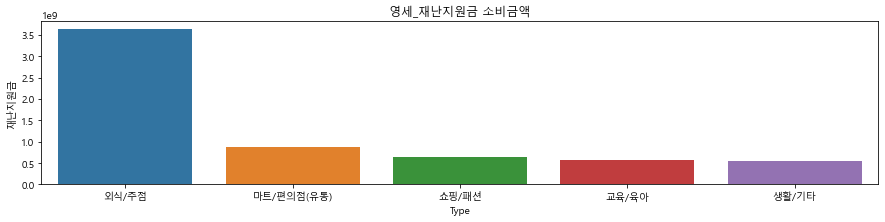

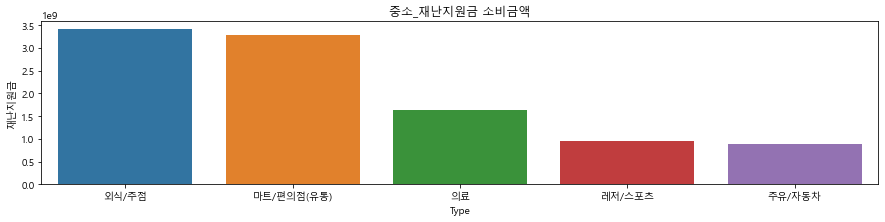

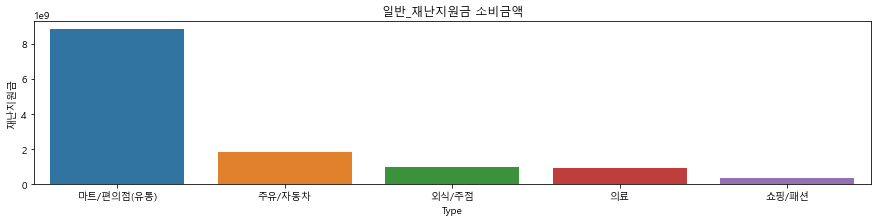

In [113]:
for fran in ['영세','일반']:
    plt.figure(figsize=(15,3))
    pie_outside, label_outside = ax.pie(size,
                                   labels = names,
                                   radius=1.3,
                                   colors=[a(0.6),b(0.6),c(0.6)],
                                   labeldistance=0.8,
                                   shadow=False,
                                   explode=[0,0,0],
                                   startangle=0)
    sns.barplot(x='Type', y='DisSpent', data=fran_type[fran_type.FranClass==fran].head(5))
    plt.title('{}_재난지원금 소비금액'.format(fran))
    plt.ylabel('재난지원금')
    plt.show()

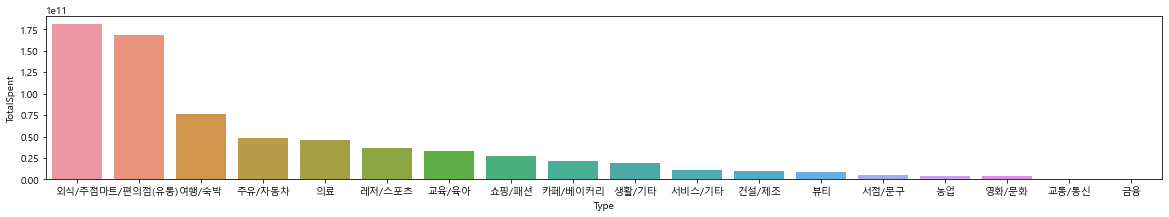

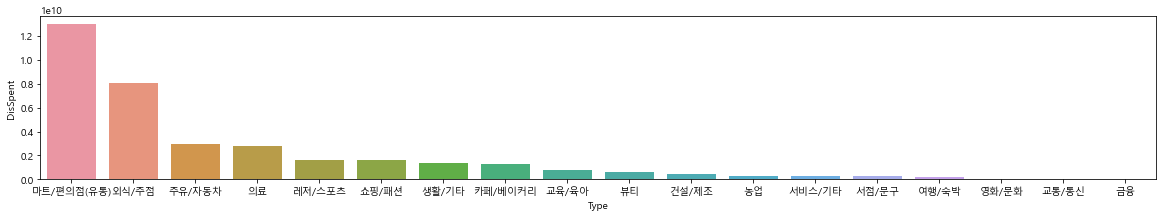

In [76]:
type_spent = df_n.groupby('Type').sum()[['TotalSpent','DisSpent']]
type_spent= type_spent.sort_values(by=['TotalSpent','DisSpent'],ascending=False)

plt.figure(figsize=(20,3))
sns.barplot(x=type_spent.index,y='TotalSpent',data=type_spent)
plt.show()

type_spent= type_spent.sort_values(by=['DisSpent'],ascending=False)
plt.figure(figsize=(20,3))
sns.barplot(x=type_spent.index,y='DisSpent',data=type_spent)
plt.show()

In [77]:
type_spent['percent']=type_spent.DisSpent / type_spent.TotalSpent * 100

In [78]:
type_spent.sort_values(by=['percent'],ascending=False)

,TotalSpent,DisSpent,percent
Type,,,
교통/통신,198732969,16066058,8.084244
농업,4231683169,327248139,7.733285
마트/편의점(유통),168424415308,12982778807,7.708371
뷰티,8407837270,632812727,7.526463
생활/기타,19445888361,1332044658,6.850007
서점/문구,4697722127,296125370,6.303595
의료,45806291307,2806146091,6.126115
쇼핑/패션,26835288956,1636883527,6.099743
주유/자동차,48520392063,2935462356,6.049956
